# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Sobhan Asasi
2.   Student Number: 400206392


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [ ]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

training_data = dataset.sample(frac=0.8, random_state=50).reset_index(drop=True)
testing_data = dataset.drop(training_data.index).reset_index(drop=True)

x_train = training_data.iloc[:,1].to_numpy().reshape(-1,1)
y_train = training_data.iloc[:,2].to_numpy().reshape(-1,1)

x_test = testing_data.iloc[:,1].to_numpy().reshape(-1,1)
y_test = testing_data.iloc[:,2].to_numpy().reshape(-1,1)

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [ ]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
a = np.ones((x_train.shape[0],1))
A = np.append(x_train, a, axis=1)
A_T = np.transpose(A)
B = np.matmul(np.linalg.inv(np.matmul(A_T, A)),A_T)
m = np.matmul(B, y_train)

In [ ]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(predicted_train_y, y_train)
test_error = mean_squared_error(predicted_test_y, y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32616732494155826
MSE test error: 0.35262722139320324


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

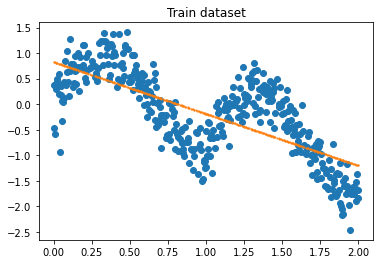

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

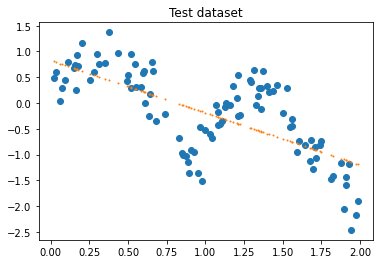

In [ ]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

-write here-

خطاهای بدست آمده 0.36 و 0.35 هستند که قابل قبول نیستند.

آخرین خط رسم شده مربوط به داده های تست هستند هر داده تست در شیب بدست آمده ضرب میشود و با بایاس محاسبه جمع می شود. مشاهده میشود که خط تخمین زده شده با مقادیر اصلی تفاوت زیادی دارد.

طبیعتا این تخمین برای این دیتاست مناسب نیست چرا که با رسم داده ها متوجه میشویم که فرم داده های ما بصورت خطی نیستند پس با رگرسیون خطی هم نمیتوان این داده ها را مدل کرد.نقاط دیتاست ما فرم غیرخطی دارند ولی رگرسیون خطی تخمین خطی است.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

-write here-

این مدل وزن دار برای فاز تست عملکرد به مراتب بهتری نسبت به مدل خطی دارد، چرا که در این مدل برای هر نقطه تست یک شیب و بایاس تخمین زده میشود و مقدار این شیب و بایاس تخمین زده شده بر مبنای نقاط آموزشی است که حول نقطه هستند. در محاسبه این بایاس و شیب تمامی نقاط نقش دارند اما نقش نقاط نزدیکتر به نقطه تست پر رنگتر است ، به بیانی دیگر نقاط نزدیکتر وزن بیشتری دارند. این وزن ها توسط یک تابع مشخص که آن را تابع وزن مینامیم مشخص میشود.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [ ]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        the_query_point = np.ravel(the_query_point)
        diff = xi - the_query_point
        W[i, i] = np.exp(-1*np.matmul(np.transpose(diff),diff)/(2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [ ]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    a = np.matmul(np.transpose(X), W)
    b = np.linalg.inv(np.matmul(a,X))
    c = np.matmul(a, train_Y)
    theta = np.matmul(b, c)
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [ ]:
hyperparameter = 0.05
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_test = np.asarray(predicted_test)
error = mean_squared_error(predicted_test.reshape(-1,1), y_test)
print(f"MSE test error: {error}")

/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


MSE test error: 0.09039403767702782


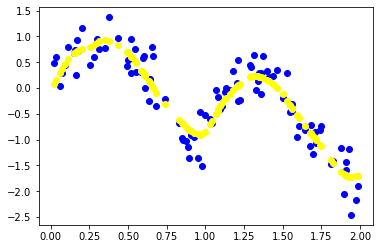

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

-write here-

همانطور که به وضوح مشخص است این مدل وزن دار توانست یک دیتا غیر خطی را مدل کند و 
با محاسبات انجام شده بدست آمد که خطا از 0.35 به 0.09 رسیده است

در حالت خطی با توجه به دادگان آموزش یک شیب و بایاس بدست می آمد و همان هم برای دادگان فاز تست بکار میرفت که با توجه به غیر خطی بودن داده ها خطا بسیار زیاد بود. اما در روش رگرسیون محلی وزن دار برای محاسبه جواب برای هر یک از نقاط تست یک شیب و بایاس بدست می آید، شیب و بایاس بدست آمده به همه داده ها مرتبط است ولی نقاط نزدیکتر به نقطه تست نقش بیشتری دارند و وزن بیشتری برای محاسبه وزن و بایاس دارند.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

-write here-

در این روش برای محاسبه مقدار هر نقطه تست تعداد مشخصی از نزدکترین نقاط آموزش به .
آن استخراج میشود و روی مقادیر آنها میانگین گرفته میشود. این روش برای داده هایی که حالت غیر خطی دارند به مراتب از رگرسیون خطی بهتر است و میتواند برای داده های غیرخطی بکار رود.

### Part10:
Implementing the `KNN model`.

In [ ]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y
        
    def distance(self, x1, x2):
        distance = ((x1 - x2)**2).sum(axis=1)**0.5
        return distance

    def return_nn_ids(self, x):
        distances = self.distance(x, self.X)
        indices = np.argpartition(distances, self.k)[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = self.Y[neareest_indices,:].mean(axis=0)[0]
        return predicted_y

In [ ]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    predicted_y = np.asarray(predicted_y)
    error = mean_squared_error(predicted_y, y_test)
    return error, predicted_y

In [ ]:
k = 10
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.08251116512990475


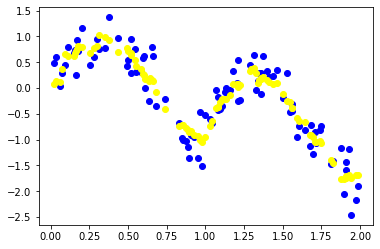

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

-write here-

همانطور که مشخص است خطای تست نسبت به رگرسیون خطی به مقدار بسیار زیادی کاهش یافت و نسبت به رگرسیون وزن دار محلی هم بهبود یافت.

با توجه به نمودار رسم شده هم بهبود نسب به مدل رگرسیون خطی مشخص است منتها نسبت به رگرسیون وزن دار کمی از پیوستگی و نرم بودن خط کاسته شده است دلیلش هم این است که در رگرسیون وزن دار از همه نقاط استفاده میشد و برای هر نقطه یک شیب و بایاس بدست می آمد.

In [ ]:
K = [5,10,15]
num_split = 10
indexes = np.array(training_data.index)
indexes_chunks = np.array_split(indexes, num_split)
info = {}
for k in K:
    sum_error_k = 0
    for chunk in indexes_chunks:
        train_data = training_data.copy()
        x_valid = train_data.iloc[chunk,1].to_numpy().reshape(-1,1)
        y_valid = train_data.iloc[chunk,2].to_numpy().reshape(-1,1)
        train = train_data.drop(index=chunk)
        x_train = train.iloc[:,1].to_numpy().reshape(-1,1)
        y_train = train.iloc[:,2].to_numpy().reshape(-1,1)
        error_k,_ = evaluation(k, x_train, y_train, x_valid, y_valid)
        sum_error_k += error_k
    info[str(k)] = sum_error_k / num_split
        
        
info

{'5': 0.10140582128692277,
 '10': 0.09696011751563918,
 '15': 0.09588453799636666}